In [1]:
!pip install -I numpy==1.19.2
!pip install snowflake-connector-python
import warnings
warnings.filterwarnings("ignore")


     |████████████████████████████████| 14.5 MB 5.1 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


     |████████████████████████████████| 14.9 MB 4.1 MB/s 
     |████████████████████████████████| 192 kB 43.5 MB/s 
     |████████████████████████████████| 1.9 MB 57.6 MB/s 
     |████████████████████████████████| 104 kB 59.6 MB/s 
     |████████████████████████████████| 54 kB 2.0 MB/s 
     |████████████████████████████████| 3.0 MB 39.2 MB/s 


In [2]:
!pip install -I pyarrow==5.0.0

     |████████████████████████████████| 23.6 MB 1.5 MB/s 
     |████████████████████████████████| 15.7 MB 58 kB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
yellowbrick 1.3.post1 requires numpy<1.20,>=1.16.0, but you have numpy 1.21.4 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [3]:
# import basic data science libraries

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
import snowflake.connector

In [4]:
import getpass

# using a simpler way to use your login info without embedding it in the notebook 
# other enterprise connection patterns (e.g., SSO) are in the Snowflake docs: https://docs.snowflake.com/en/user-guide/python-connector-example.html
snowflake_username = getpass.getpass("Enter Snowflake Username")
snowflake_pwd = getpass.getpass("Enter Snowflake Password")
snowflake_acct = 'nna57244.us-east-1'

print(snowflake_username)
print(snowflake_acct)

Enter Snowflake Username··········
Enter Snowflake Password··········
jpatanooga
nna57244.us-east-1


In [5]:

# Gets the version
ctx = snowflake.connector.connect(
  user=snowflake_username,
  password=snowflake_pwd,
  account=snowflake_acct
  )
cs = ctx.cursor()
try:
	cs.execute("SELECT current_version()")
	one_row = cs.fetchone()
	print(one_row[0])



	#cs.cursor().execute("USE WAREHOUSE tiny_warehouse_mg")
	cs.execute("USE DATABASE PREDICTIVE_MAINTENANCE")    


	#cs.execute("SELECT count(TYPE) from RAW_DEVICE_DATA where MACHINE_FAILURE = 1;")
	#one_row = cs.fetchone()
	#print("Records with Failures: " + str(one_row[0]))

	query_output = cs.execute( "select TYPE, AIR_TEMPERATURE, PROCESS_TEMPERATURE, ROTATIONAL_SPEED, TORQUE, TOOL_WEAR, MACHINE_FAILURE  from SUMMARY_SENSOR_DATA;" )

	df = query_output.fetch_pandas_all() #.to_csv("/path/to/write/table.csv")	
	#df.to_csv("./data/full_snowflake_dataset.csv", index=False)	

	print( df )


finally:
    cs.close()



ctx.close()

5.41.1
     TYPE  AIR_TEMPERATURE  ...  TOOL_WEAR  MACHINE_FAILURE
0       M            298.1  ...        0.0                0
1       L            298.2  ...        3.0                0
2       L            298.1  ...        5.0                0
3       L            298.2  ...        7.0                0
4       L            298.2  ...        9.0                0
...   ...              ...  ...        ...              ...
5245    M            298.8  ...       14.0                0
5246    H            298.9  ...       17.0                0
5247    M            299.0  ...       22.0                0
5248    H            299.0  ...       25.0                0
5249    M            299.0  ...       30.0                0

[10000 rows x 7 columns]


In [6]:

print( df.info() )

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 5249
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   TYPE                 10000 non-null  object 
 1   AIR_TEMPERATURE      10000 non-null  float64
 2   PROCESS_TEMPERATURE  10000 non-null  float64
 3   ROTATIONAL_SPEED     10000 non-null  float64
 4   TORQUE               10000 non-null  float64
 5   TOOL_WEAR            10000 non-null  float64
 6   MACHINE_FAILURE      10000 non-null  int8   
dtypes: float64(5), int8(1), object(1)
memory usage: 556.6+ KB
None


In [7]:
# map categorical variable 'diagnosis' into numeric

df["TYPE"] = df["TYPE"].map({'H': 2, 'M': 1, 'L': 0})
df.head()

,TYPE,AIR_TEMPERATURE,PROCESS_TEMPERATURE,ROTATIONAL_SPEED,TORQUE,TOOL_WEAR,MACHINE_FAILURE
0,1,298.1,308.6,1551.0,42.8,0.0,0
1,0,298.2,308.7,1408.0,46.3,3.0,0
2,0,298.1,308.5,1498.0,49.4,5.0,0
3,0,298.2,308.6,1433.0,39.5,7.0,0
4,0,298.2,308.7,1408.0,40.0,9.0,0


In [8]:
# drop redundant columns / unneeded columns
# df.drop('id', axis=1, inplace=True)
'''
df.drop('UDI', axis=1, inplace=True)
df.drop('TWF', axis=1, inplace=True)
df.drop('HDF', axis=1, inplace=True)
df.drop('PWF', axis=1, inplace=True)
df.drop('OSF', axis=1, inplace=True)
df.drop('RNF', axis=1, inplace=True)
'''
# however, we took care of dropping these columns by simply not selecting them from snowflake

"\ndf.drop('UDI', axis=1, inplace=True)\ndf.drop('TWF', axis=1, inplace=True)\ndf.drop('HDF', axis=1, inplace=True)\ndf.drop('PWF', axis=1, inplace=True)\ndf.drop('OSF', axis=1, inplace=True)\ndf.drop('RNF', axis=1, inplace=True)\n"

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 5249
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   TYPE                 10000 non-null  int64  
 1   AIR_TEMPERATURE      10000 non-null  float64
 2   PROCESS_TEMPERATURE  10000 non-null  float64
 3   ROTATIONAL_SPEED     10000 non-null  float64
 4   TORQUE               10000 non-null  float64
 5   TOOL_WEAR            10000 non-null  float64
 6   MACHINE_FAILURE      10000 non-null  int8   
dtypes: float64(5), int64(1), int8(1)
memory usage: 556.6 KB


In [10]:
df_num = df.select_dtypes(include = ['float64', 'int64', 'int8'])
print( df_num.info() )

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 5249
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   TYPE                 10000 non-null  int64  
 1   AIR_TEMPERATURE      10000 non-null  float64
 2   PROCESS_TEMPERATURE  10000 non-null  float64
 3   ROTATIONAL_SPEED     10000 non-null  float64
 4   TORQUE               10000 non-null  float64
 5   TOOL_WEAR            10000 non-null  float64
 6   MACHINE_FAILURE      10000 non-null  int8   
dtypes: float64(5), int64(1), int8(1)
memory usage: 556.6 KB
None


In [11]:
# check for NA values
df_num.isna().any()

TYPE                   False
AIR_TEMPERATURE        False
PROCESS_TEMPERATURE    False
ROTATIONAL_SPEED       False
TORQUE                 False
TOOL_WEAR              False
MACHINE_FAILURE        False
dtype: bool

In [12]:

# look at the mean of different features for both the classes to see which features capture the variability

df_num.groupby('MACHINE_FAILURE').mean()

,TYPE,AIR_TEMPERATURE,PROCESS_TEMPERATURE,ROTATIONAL_SPEED,TORQUE,TOOL_WEAR
MACHINE_FAILURE,,,,,,
0,0.504917,299.973999,309.995570,1540.260014,39.629655,106.693717
1,0.368732,300.886431,310.290265,1496.486726,50.168142,143.781711


In [13]:
df_normal = df_num[df_num['MACHINE_FAILURE'] == 0]
df_failure = df_num[df_num['MACHINE_FAILURE'] == 1]

total_records = len(df_num.index)
total_normal_records = len(df_normal.index)
total_failure_records = len(df_failure.index)

percent_failure = total_failure_records / total_records

print("Total records in dataset: " + str(total_records))

print("Total normal records in dataset: " + str(total_normal_records))
print("Total failure records in dataset: " + str(total_failure_records))

print("Percent failure records in dataset: " + str(percent_failure))

Total records in dataset: 10000
Total normal records in dataset: 9661
Total failure records in dataset: 339
Percent failure records in dataset: 0.0339


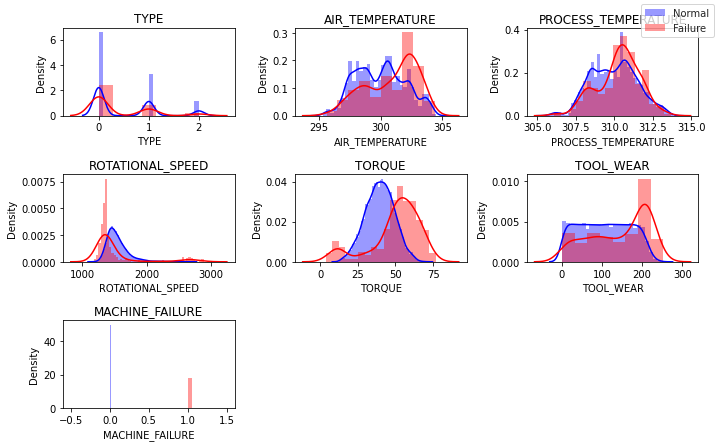

In [14]:
# Plot frequency distributions of the features to visualize which features capture the most variability



fig = plt.figure(figsize=(10,20))
for i,col_name in enumerate(list(df_num.columns[0:30])):
    i +=1
    ax = fig.add_subplot(10,3,i)
    sns.distplot(df_normal[col_name], label = 'Normal', kde = True, color= 'b')
    sns.distplot(df_failure[col_name], label= 'Failure', kde = True, color= 'r')
    ax.set_title(col_name)

sns.set_style("whitegrid")
plt.tight_layout()
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right')
plt.show()

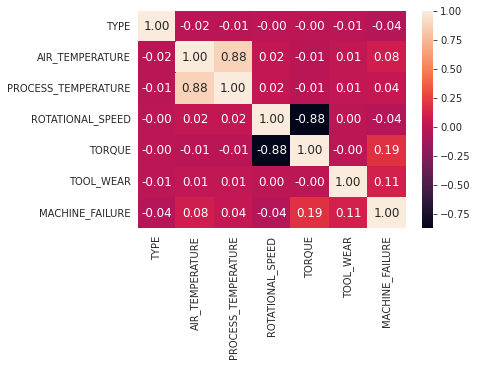

In [15]:
# calculate correlation matrix
corr = df_num.corr()# plot the heatmap
# , cmap=sns.diverging_palette(220, 20, as_cmap=True)
corr_heatmap = sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, fmt='.2f', annot_kws={'size': 12})

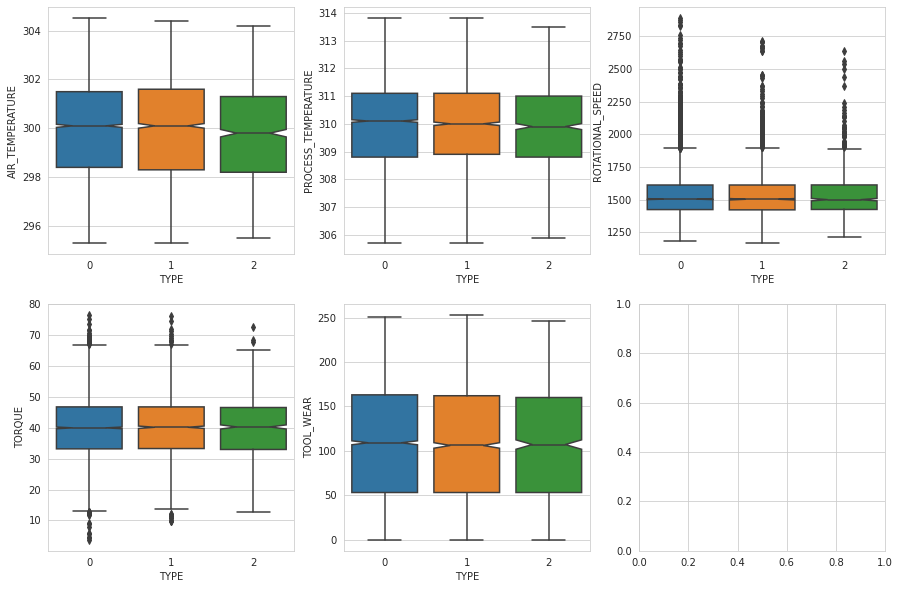

In [16]:
numerical = [
  'AIR_TEMPERATURE', 'PROCESS_TEMPERATURE', 'ROTATIONAL_SPEED', 'TORQUE', 'TOOL_WEAR'
]
categorical = [
  'TYPE'
]

#housing = housing[numerical + categorical]
#housing.shape

fig, ax = plt.subplots(2, 3, figsize=(15, 10))

#for var, subplot in zip(categorical, ax.flatten()):
#    sns.boxplot(x='MACHINE_FAILURE', y='MACHINE_FAILURE', data=housing, ax=subplot)

# sns.boxplot(x='MACHINE_FAILURE', y='AIR_TEMPERATURE', data=df_num, ax=subplot)

for var, subplot in zip(numerical, ax.flatten()):
	
  sns.boxplot(x='TYPE', y=var, data=df_num, ax=subplot, notch=True)



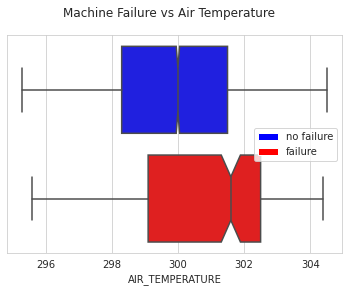

In [17]:

fig2, ax2 = plt.subplots()

sns.boxplot(x="AIR_TEMPERATURE", y="MACHINE_FAILURE", data=df_num, orient="h", palette={1:"red", 0:"blue"}, ax=ax2, notch=True)

ax2.get_yaxis().set_visible(False)

fig2.suptitle("Machine Failure vs Air Temperature")

color_patches = [
    Patch(facecolor="blue", label="no failure"),
    Patch(facecolor="red", label="failure")
]
ax2.legend(handles=color_patches);


In [18]:
df_normal = df_num[df_num['MACHINE_FAILURE'] == 0]
df_failure = df_num[df_num['MACHINE_FAILURE'] == 1]

type_count_normal_series = df_normal['TYPE'].value_counts() 

print( type_count_normal_series )

type_count_fail_series = df_failure['TYPE'].value_counts() 

print( type_count_fail_series )

type_0_ratio = type_count_fail_series.get(0) / type_count_normal_series.get(0)
type_1_ratio = type_count_fail_series.get(1) / type_count_normal_series.get(1)
type_2_ratio = type_count_fail_series.get(2) / type_count_normal_series.get(2)

print( type_0_ratio )
print( type_1_ratio )
print( type_2_ratio )

0    5765
1    2914
2     982
Name: TYPE, dtype: int64
0    235
1     83
2     21
Name: TYPE, dtype: int64
0.040763226366001735
0.02848318462594372
0.021384928716904276


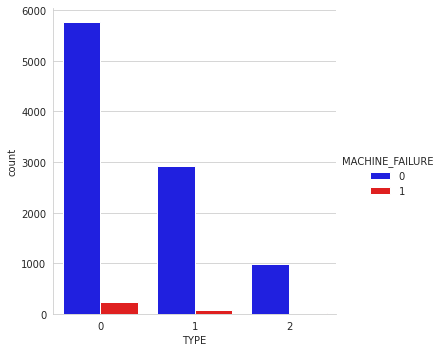

In [19]:
# need to account for the [ Type, Machine failure ] comparison

fig3, ax3 = plt.subplots()

sns.catplot(x="TYPE", hue="MACHINE_FAILURE", data=df_num, kind="count", palette={0:"blue", 1:"red"}, ax=ax3)

plt.close(1) # catplot creates an extra figure we don't need

#ax.legend(title="Machine Performance")
#ax.set_xticklabels(["Failure", "Normal"])
#ax.set_xlabel("Machine Type")

fig3.suptitle("Normal Operations vs Failure: Predictive Maintenance");

In [20]:

df_num.head(200)

,TYPE,AIR_TEMPERATURE,PROCESS_TEMPERATURE,ROTATIONAL_SPEED,TORQUE,TOOL_WEAR,MACHINE_FAILURE
0,1,298.1,308.6,1551.0,42.8,0.0,0
1,0,298.2,308.7,1408.0,46.3,3.0,0
2,0,298.1,308.5,1498.0,49.4,5.0,0
3,0,298.2,308.6,1433.0,39.5,7.0,0
4,0,298.2,308.7,1408.0,40.0,9.0,0
...,...,...,...,...,...,...,...
195,0,298.3,308.5,1453.0,42.9,89.0,0
196,2,298.3,308.6,1432.0,49.5,91.0,0
197,1,298.4,308.6,1527.0,40.9,96.0,0
198,0,298.4,308.7,1588.0,35.0,99.0,0


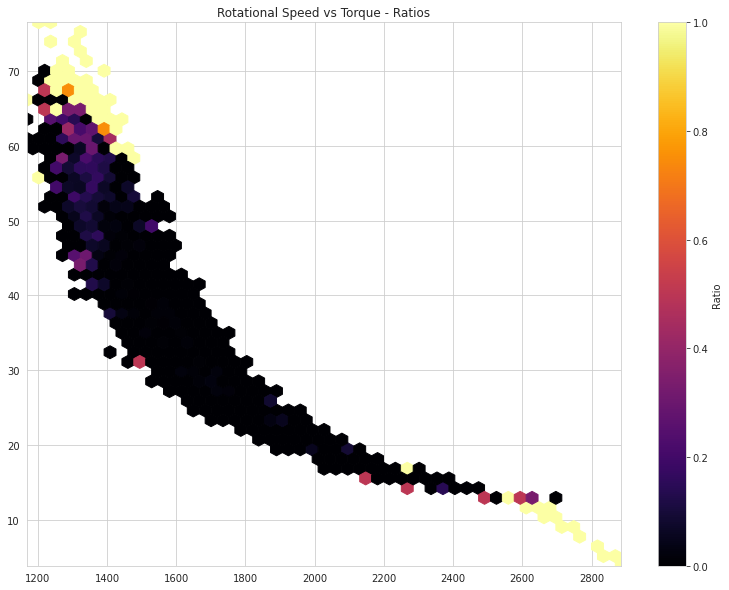

In [21]:

def reduce_C_function_ratio(C):
  all_count = len(C)

  one_count = np.sum(C)

  return one_count / float(all_count);


y = df_num['TORQUE']
x = df_num['ROTATIONAL_SPEED']
xmin = x.min()
xmax = x.max()
ymin = y.min()
ymax = y.max()

fig, axs = plt.subplots(ncols=1,  figsize=(12, 10)) #sharey=True,

fig.subplots_adjust(hspace=0.5, left=0.07, right=0.93)
ax = axs
hb = ax.hexbin(x, y, C=df_num['MACHINE_FAILURE'], gridsize=50, cmap='inferno', reduce_C_function=reduce_C_function_ratio) #np.sum)
ax.set(xlim=(xmin, xmax), ylim=(ymin, ymax))
ax.set_title("Rotational Speed vs Torque - Ratios")
cb = fig.colorbar(hb, ax=ax)
cb.set_label('Ratio')

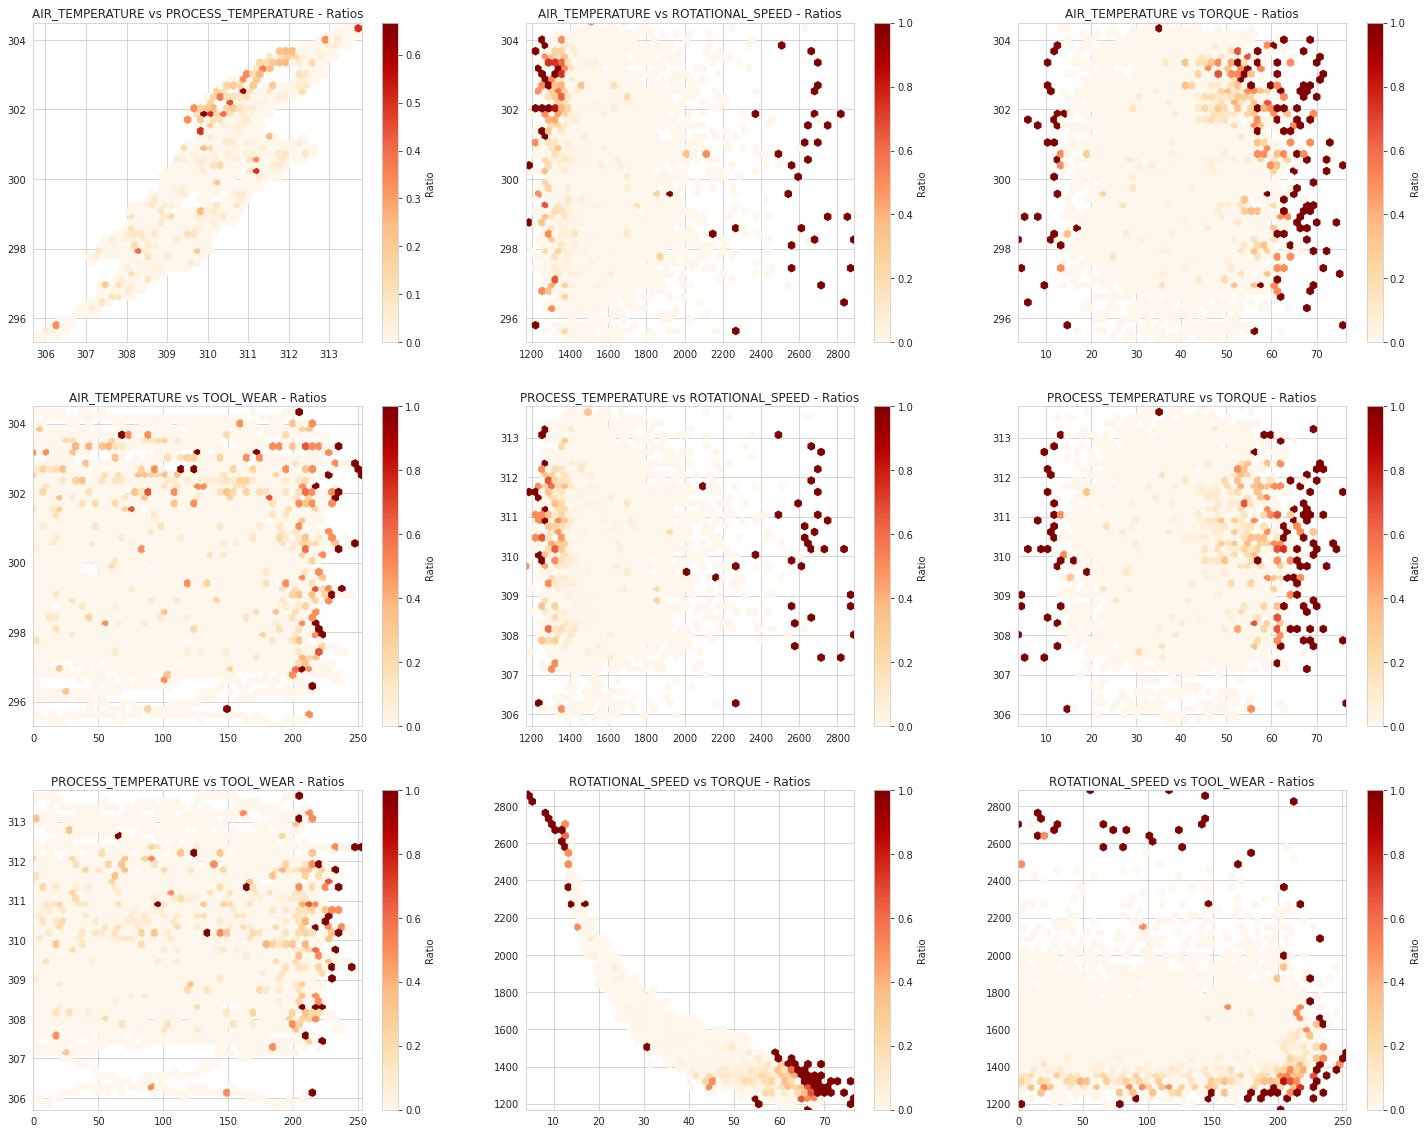

In [24]:
from itertools import chain, combinations

numerical = [
  'AIR_TEMPERATURE', 'PROCESS_TEMPERATURE', 'ROTATIONAL_SPEED', 'TORQUE', 'TOOL_WEAR'
]
categorical = [
  'TYPE'
]

fig, ax = plt.subplots(3, 3, figsize=(25, 20))

var_combinations = [(comb) for comb in combinations(numerical, 2)]


for var_c, subplot in zip(var_combinations, ax.flatten()):

  var_a, var_b = var_c
  #print( var_a)

  y = df_num[var_a]
  x = df_num[var_b]
  xmin = x.min()
  xmax = x.max()
  ymin = y.min()
  ymax = y.max()

  #fig, axs = plt.subplots(ncols=1,  figsize=(12, 10)) #sharey=True,

  #fig.subplots_adjust(hspace=0.5, left=0.07, right=0.93)
  ax = subplot
  hb = ax.hexbin(x, y, C=df_num['MACHINE_FAILURE'], gridsize=50, cmap='OrRd', reduce_C_function=reduce_C_function_ratio) #np.sum)
  ax.set(xlim=(xmin, xmax), ylim=(ymin, ymax))
  ax.set_title(var_a + " vs " + var_b + " - Ratios")
  cb = fig.colorbar(hb, ax=ax)
  cb.set_label('Ratio')
	
  #sns.boxplot(x='TYPE', y=var, data=df_num, ax=subplot, notch=True)